In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('./titanic/train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# embarked 중간정착항구

In [4]:
print('\n ### train data info ### \n')
print(df.info())


 ### train data info ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# null columns preprocessing
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)

In [6]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df['Cabin'].value_counts()

N              687
G6               4
B96 B98          4
C23 C25 C27      4
E101             3
              ... 
D19              1
D10 D12          1
E17              1
B4               1
A5               1
Name: Cabin, Length: 148, dtype: int64

In [9]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [10]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Sex,Survived'>

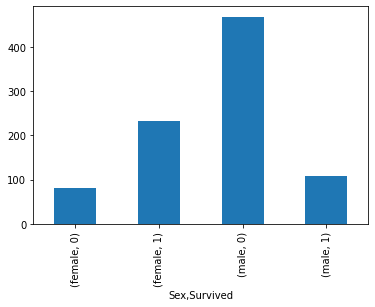

In [11]:
df.groupby(['Sex', 'Survived'])['Survived'].count().plot.bar()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

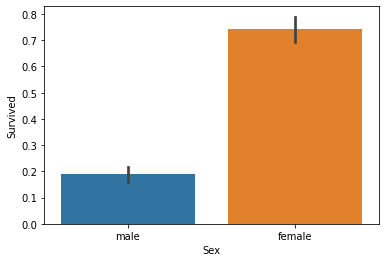

In [12]:
sns.barplot(x='Sex', y='Survived',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

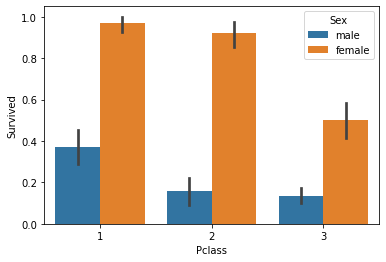

In [13]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

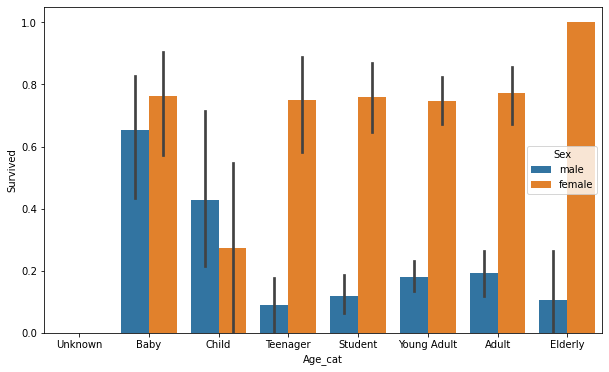

In [14]:
def get_category(age):
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=group_names)
df.drop('Age_cat', axis=1, inplace=True)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# 각 항목을 숫자로 바꿔줌 
def encode_features(dafr):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dafr[feature])
        dafr[feature] = le.transform(dafr[feature])
    return dafr

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [19]:
from sklearn.preprocessing import LabelEncoder

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

    

In [20]:
df = pd.read_csv('./titanic/train.csv')
y_df = df['Survived']
x_df = df.drop('Survived', axis=1)
x_df = transform_features(x_df)
x_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, 
                                                   test_size=0.2, random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


dt = DecisionTreeClassifier(random_state=11)
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression()

# 1. dt
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('dt accuracy:', f'{accuracy_score(y_test, dt_pred):.4f}')

#
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('rf accuracy:', accuracy_score(y_test, rf_pred))

# 
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('lr accuracy:', accuracy_score(y_test, lr_pred))

dt accuracy: 0.7877
rf accuracy: 0.8547486033519553
lr accuracy: 0.8491620111731844


C:\Users\hmkang\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_df)):
        X_train, X_test = x_df.values[train_index], x_df.iloc[test_index]
        y_train, y_test = y_df.values[train_index], y_df.iloc[test_index]
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print("iter_count", accuracy)
        
    mean_score = np.mean(scores)
    print('mean score:', mean_score)
exec_kfold(dt, folds=5)

iter_count 0.7541899441340782
iter_count 0.7808988764044944
iter_count 0.7865168539325843
iter_count 0.7696629213483146
iter_count 0.8202247191011236
mean score: 0.782298662984119


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_df, y_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('iter_count:', accuracy)
print('mean score: ', np.mean(scores))

iter_count: 0.7932960893854749
iter_count: 0.797752808988764
iter_count: 0.848314606741573
iter_count: 0.7640449438202247
iter_count: 0.8651685393258427
mean score:  0.8137153976523758


In [25]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
              'min_samples_split':[2, 3, 5],
              'min_samples_leaf' : [1, 5, 8]}
grid_dt = GridSearchCV(dt, param_grid=parameters, scoring='accuracy', cv=5) # 객체생성
grid_dt.fit(X_train, y_train) # fit 

print('best_params_: ', grid_dt.best_params_) # best_params_ 
print('best_score_: ', grid_dt.best_score_)
best_dt = grid_dt.best_estimator_ # best_estimator_ 할당 

best_pred = best_dt.predict(X_test) # presict
accuracy = accuracy_score(y_test, best_pred) # accuracy
print('accuracy: ', f'{accuracy:.4f}')

best_params_:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
best_score_:  0.7991825076332119
accuracy:  0.8715


In [31]:
proba = best_dt.predict_proba(X_test)
proba

array([[0.43157895, 0.56842105],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.43157895, 0.56842105],
       [0.86813187, 0.13186813],
       [0.12      , 0.88      ],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.59210526, 0.40789474],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.59210526, 0.40789474],
       [0.43157895, 0.56842105],
       [0.86813187, 0.13186813],
       [0.59210526, 0.40789474],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.86813187, 0.13186813],
       [0.59210526, 0.40789474],
       [0.

In [35]:
best_pred.reshape(-1, 1)

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
    